# Basic Workflow

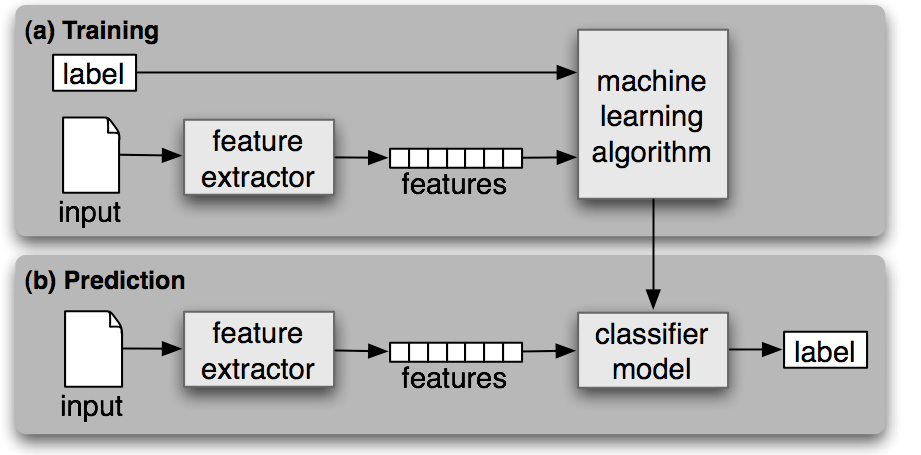

In [1]:
from IPython.display import Image
Image(filename='images/supervised_workflow.PNG',width=500,height=300)

# Case Study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_excel('data/College_Training dataset.xlsx')
test = pd.read_excel('data/College_Test_dataset.xlsx')

In [4]:
df = pd.concat([train,test])
df = df.set_index('Student No')

## Data Wrangling Using Pandas

In [5]:
df.head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
Student No,,,,,,,,,
1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,Placed
2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,Placed
3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,Placed
4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,Placed
5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,Placed


In [6]:
df.shape

(370, 9)

In [7]:
df.size

3330

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 1 to 370
Data columns (total 9 columns):
Gender            359 non-null object
Percent_SSC       370 non-null float64
Board_SSC         367 non-null object
Percent_HSC       357 non-null float64
Board_HSC         368 non-null object
Stream_HSC        364 non-null object
Percent_Degree    369 non-null float64
Course_Degree     366 non-null object
Placement         300 non-null object
dtypes: float64(3), object(6)
memory usage: 28.9+ KB


In [9]:
df.columns

Index([u'Gender', u'Percent_SSC', u'Board_SSC', u'Percent_HSC', u'Board_HSC',
       u'Stream_HSC', u'Percent_Degree', u'Course_Degree', u'Placement'],
      dtype='object')

In [10]:
df.Gender.value_counts(dropna=False)

M      239
F      120
NaN     11
Name: Gender, dtype: int64

In [11]:
df.describe()

,Percent_SSC,Percent_HSC,Percent_Degree
count,370.000000,357.000000,369.000000
mean,64.670324,63.941821,62.969756
std,11.039430,11.440558,8.868641
min,37.000000,40.000000,35.000000
25%,56.000000,NaN,NaN
50%,64.000000,NaN,NaN
75%,74.000000,NaN,NaN
max,87.200000,94.700000,89.000000


In [12]:
df.describe(include='all')

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
count,359,370.000000,367,357.000000,368,364,369.000000,366,300
unique,2,NaN,3,NaN,3,3,NaN,7,2
top,M,NaN,Others,NaN,Others,Commerce,NaN,Management,Placed
freq,239,NaN,184,NaN,228,206,NaN,150,250
mean,NaN,64.670324,NaN,63.941821,NaN,NaN,62.969756,NaN,NaN
std,NaN,11.039430,NaN,11.440558,NaN,NaN,8.868641,NaN,NaN
min,NaN,37.000000,NaN,40.000000,NaN,NaN,35.000000,NaN,NaN
25%,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.Placement.describe()

count        300
unique         2
top       Placed
freq         250
Name: Placement, dtype: object

## Handling Missing Values

In [14]:
df.isnull().apply(lambda x:sum(x),axis=0)

Gender            11
Percent_SSC        0
Board_SSC          3
Percent_HSC       13
Board_HSC          2
Stream_HSC         6
Percent_Degree     1
Course_Degree      4
Placement         70
dtype: int64

In [15]:
cat_var = ['Gender','Board_SSC','Board_HSC','Stream_HSC','Course_Degree'] 
num_var = ['Percent_SSC','Percent_HSC','Percent_Degree']

In [16]:
df[num_var].head()

,Percent_SSC,Percent_HSC,Percent_Degree
Student No,,,
1,62.00,88.00,52.00
2,76.33,75.33,75.48
3,72.00,78.00,66.63
4,60.00,63.00,58.00
5,61.00,55.00,54.00


#### Treating Categorical Columns

In [17]:
df.Gender.value_counts()

M    239
F    120
Name: Gender, dtype: int64

In [18]:
df.Gender.mode()[0]

u'M'

In [19]:
#Imputation Using Mode
df['Gender'] = df.Gender.fillna(df.Gender.mode()[0])

In [20]:
def impute_missing_values(df):
    for var in cat_var:
        df[var] = df[var].fillna(df[var].mode()[0])
    return df

In [21]:
df = impute_missing_values(df)

#### Treating Continuous Variables

In [22]:
df['Percent_HSC'].mean()

63.94182072829132

In [23]:
df['Percent_HSC'] = df['Percent_HSC'].fillna(df['Percent_HSC'].mean())
df['Percent_Degree'] = df['Percent_Degree'].fillna(df['Percent_Degree'].mean())

In [24]:
df.isnull().apply(lambda x:sum(x),axis=0)

Gender             0
Percent_SSC        0
Board_SSC          0
Percent_HSC        0
Board_HSC          0
Stream_HSC         0
Percent_Degree     0
Course_Degree      0
Placement         70
dtype: int64

#### Imputation using Own Logic

In [25]:
df.groupby('Board_HSC')['Percent_HSC'].mean()

Board_HSC
CBSE      63.857205
ISC       67.028340
Others    63.359099
Name: Percent_HSC, dtype: float64

In [26]:
df.groupby(['Board_HSC','Gender'])['Percent_HSC'].mean()

Board_HSC  Gender
CBSE       F         65.015114
           M         63.259575
ISC        F         76.189455
           M         62.595543
Others     F         64.473450
           M         62.840961
Name: Percent_HSC, dtype: float64

In [27]:
df[df['Percent_HSC'].isnull()]

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
Student No,,,,,,,,,


In [28]:
d1 = df.groupby(['Board_HSC','Gender'])['Percent_HSC'].mean().to_dict()

In [29]:
d1

{(u'CBSE', u'F'): 65.015113795518204,
 (u'CBSE', u'M'): 63.259574862202953,
 (u'ISC', u'F'): 76.189454715219412,
 (u'ISC', u'M'): 62.59554260413843,
 (u'Others', u'F'): 64.473449599017698,
 (u'Others', u'M'): 62.840961301718131}

In [30]:
d1.get(('CBSE','F'))

65.015113795518204

In [31]:
temp = []
for index,row in df.iterrows():
    if pd.isnull(row['Percent_HSC']):
        temp.append(d1.get((row['Board_HSC'],row['Gender'])))
    else:
        temp.append(row['Percent_HSC'])

In [32]:
df['Percent_HSC'] = temp

In [33]:
df.loc[333]

Gender                     M
Percent_SSC               62
Board_SSC             Others
Percent_HSC          63.9418
Board_HSC                ISC
Stream_HSC           Science
Percent_Degree            68
Course_Degree     Management
Placement                NaN
Name: 333, dtype: object

## Exploratory Data Analysis

In [34]:
train = df[df.Placement.notnull()]
test = df[df.Placement.isnull()]

In [35]:
train.shape,test.shape

((300, 9), (70, 9))

In [36]:
train.sample(5)

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
Student No,,,,,,,,,
202,M,73.0,CBSE,77.0,CBSE,Science,76.0,Science,Placed
232,M,66.3,Others,83.5,Others,Science,70.0,Science,Placed
293,M,77.0,Others,77.0,Others,Commerce,70.0,Commerce,Placed
282,M,59.0,ICSE,81.0,Others,Commerce,70.0,Commerce,Placed
194,M,56.0,Others,59.0,Others,Science,65.0,Science,Not Placed


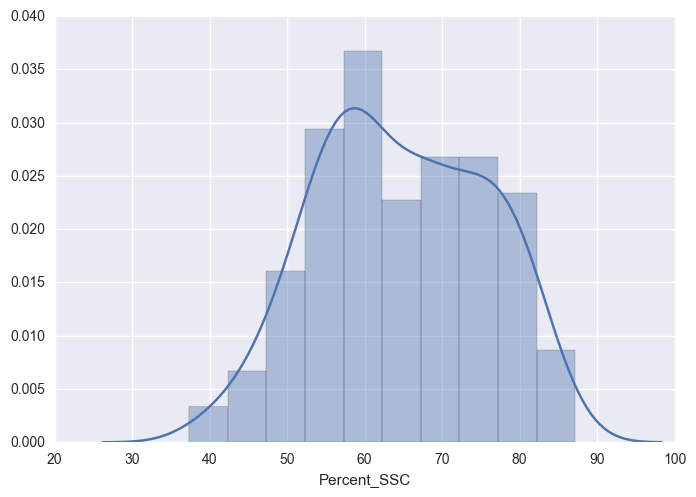

In [37]:
#plt.hist(train.Percent_SSC)
sns.distplot(train.Percent_SSC)

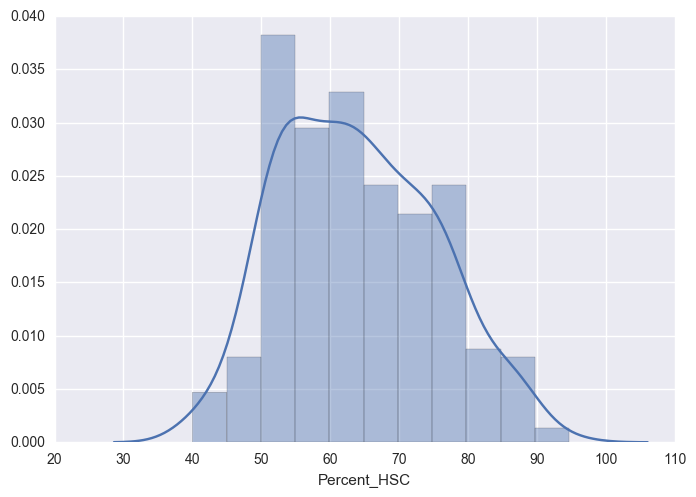

In [38]:
sns.distplot(train.Percent_HSC)

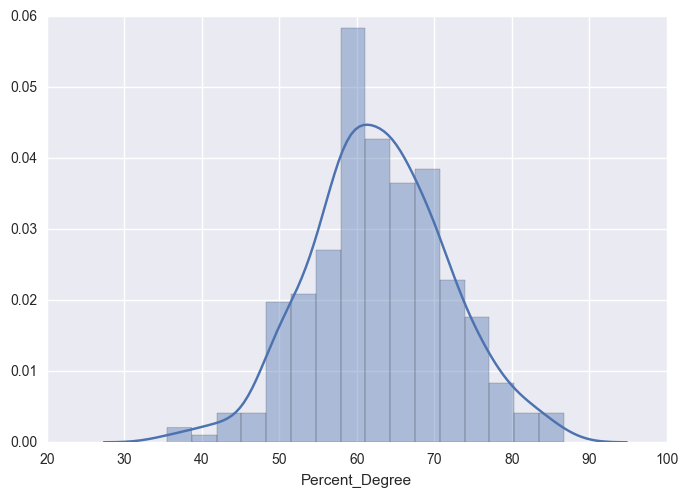

In [39]:
sns.distplot(train.Percent_Degree)

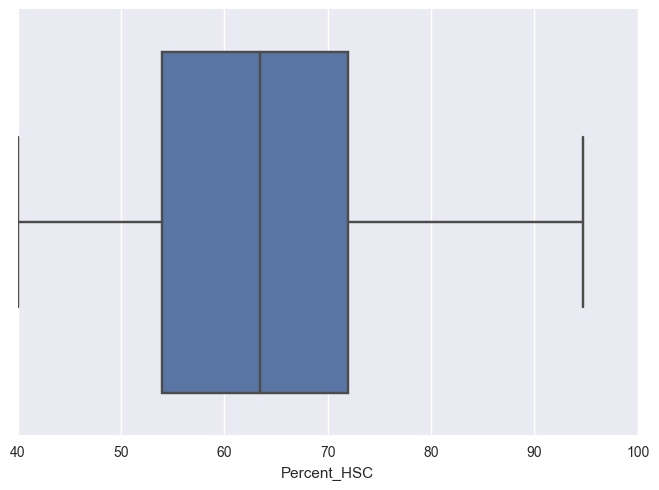

In [40]:
sns.boxplot(data=train,x='Percent_HSC')

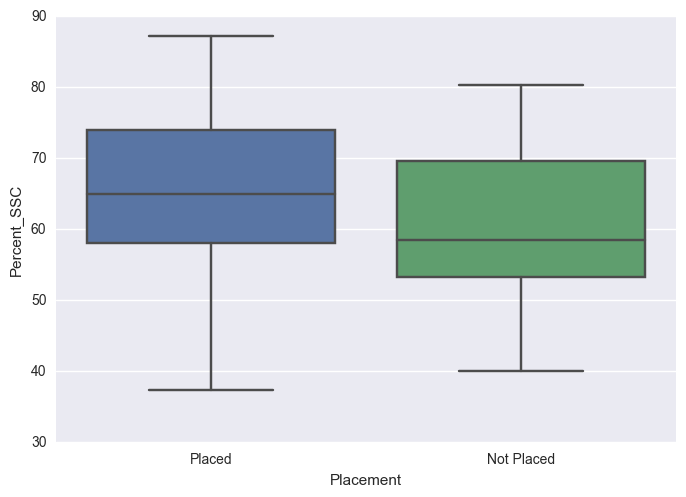

In [41]:
sns.boxplot(data=train,y='Percent_SSC',x='Placement')

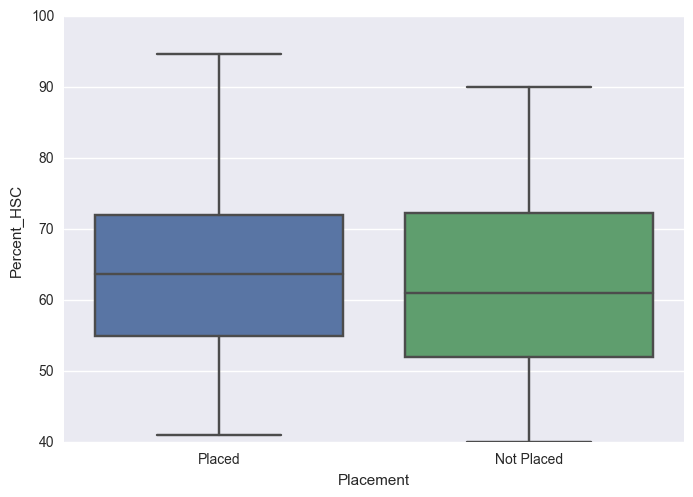

In [42]:
sns.boxplot(data=train,y='Percent_HSC',x='Placement')

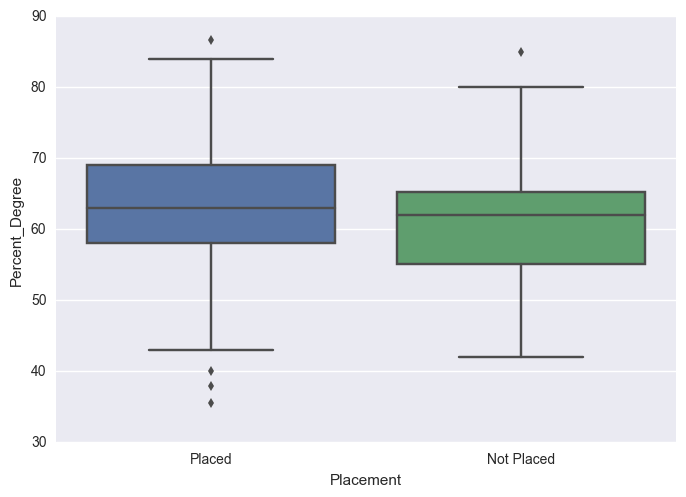

In [43]:
sns.boxplot(data=train,y='Percent_Degree',x='Placement')

In [44]:
# Excercise Plot other Numerical Features against Target and derive insights

In [45]:
from statsmodels.graphics.mosaicplot import mosaic

(<matplotlib.figure.Figure at 0xc609ba8>,
 OrderedDict([(('Placed', 'M'), (0.0, 0.0, 0.8291873963515756, 0.70963455149501653)), (('Placed', 'F'), (0.0, 0.71295681063122907, 0.8291873963515756, 0.28704318936877077)), (('Not Placed', 'M'), (0.834162520729685, 0.0, 0.16583747927031509, 0.61794019933554811)), (('Not Placed', 'F'), (0.834162520729685, 0.62126245847176076, 0.16583747927031509, 0.37873754152823919))]))

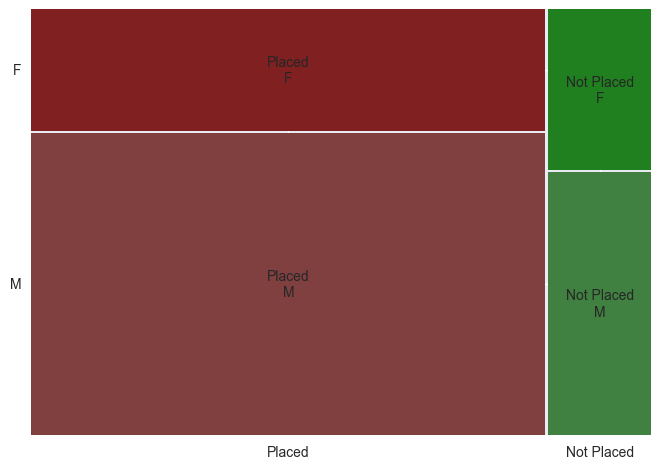

In [46]:
mosaic(train,['Placement','Gender'])

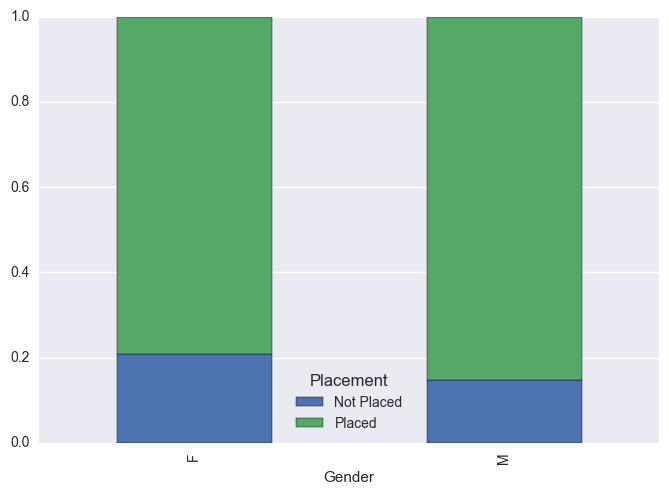

In [47]:
pd.crosstab(train.Gender,train.Placement).apply(lambda x:x/sum(x),axis=1).plot(kind='bar',stacked=True)

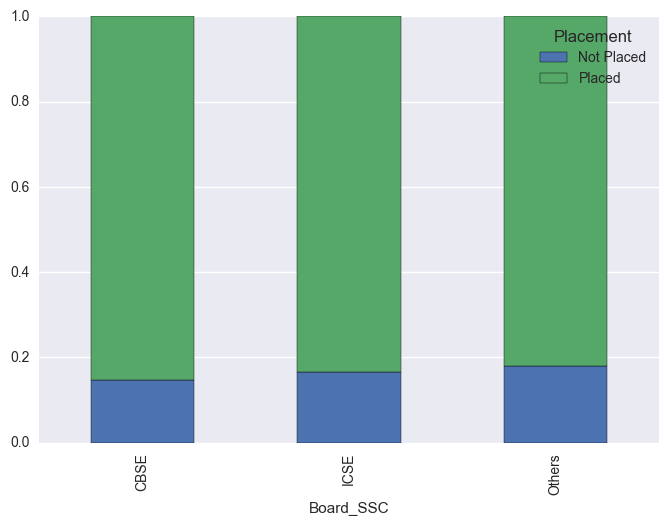

In [48]:
pd.crosstab(train.Board_SSC,train.Placement).apply(lambda x:x/sum(x),axis=1).plot(kind='bar',stacked=True)

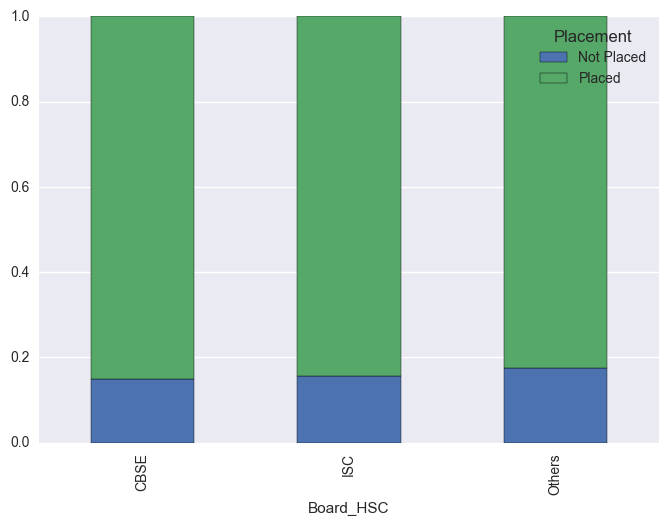

In [49]:
pd.crosstab(train.Board_HSC,train.Placement).apply(lambda x:x/sum(x),axis=1).plot(kind='bar',stacked=True)

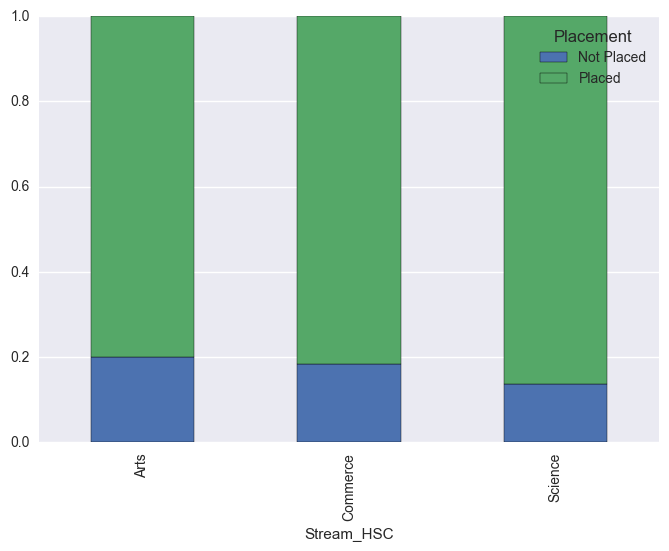

In [50]:
pd.crosstab(train.Stream_HSC,train.Placement).apply(lambda x:x/sum(x),axis=1).plot(kind='bar',stacked=True)

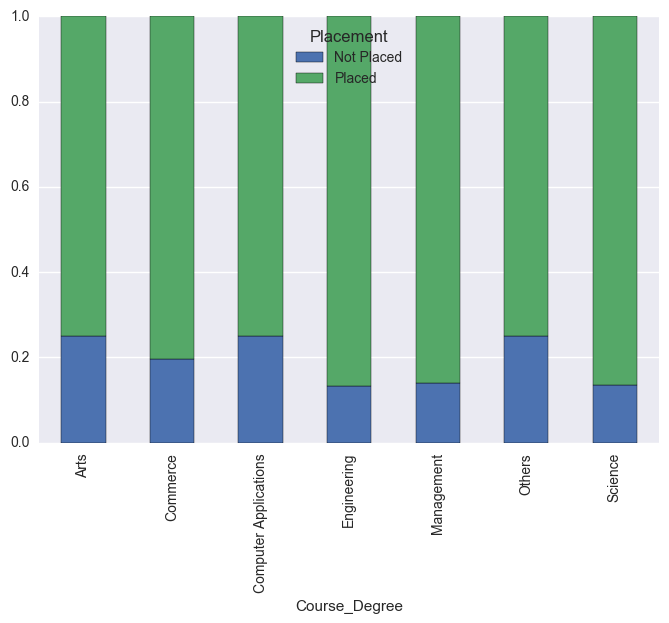

In [51]:
pd.crosstab(train.Course_Degree,train.Placement).apply(lambda x:x/sum(x),axis=1).plot(kind='bar',stacked=True)

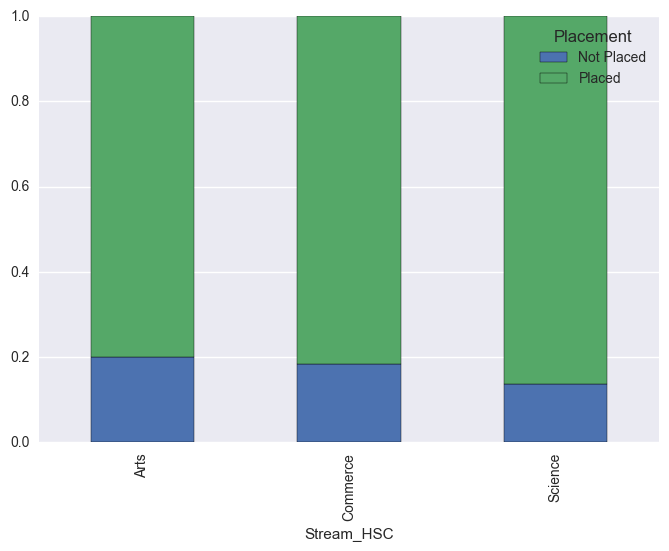

In [52]:
pd.crosstab(train.Stream_HSC,train.Placement).apply(lambda x:x/sum(x),axis=1).plot(kind='bar',stacked=True)

In [53]:
# Excercise Plot other Categorical Features against Target and derive insights

### Finding Correlation

In [54]:
train.corr()

,Percent_SSC,Percent_HSC,Percent_Degree
Percent_SSC,1.000000,0.393290,0.421397
Percent_HSC,0.393290,1.000000,0.371285
Percent_Degree,0.421397,0.371285,1.000000


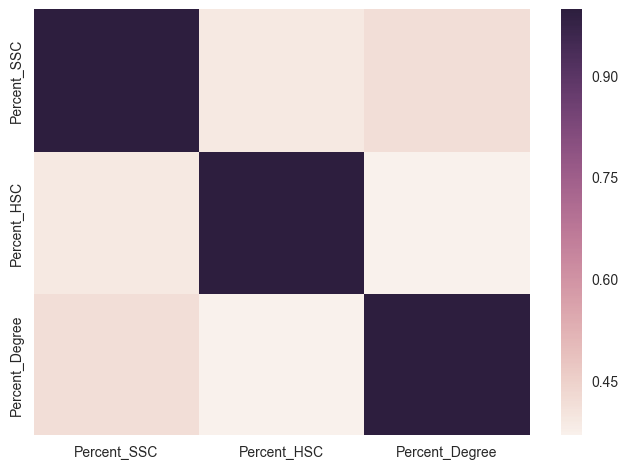

In [55]:
sns.heatmap(train.corr())

## Label Encoding

In [56]:
train.sample(5)

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
Student No,,,,,,,,,
128,F,80.32,Others,76.83,Others,Commerce,76.30,Management,Not Placed
191,M,55.00,ICSE,68.00,Others,Science,71.00,Science,Not Placed
236,F,49.80,CBSE,51.20,CBSE,Commerce,46.22,Commerce,Not Placed
288,M,77.00,CBSE,69.20,CBSE,Commerce,61.00,Commerce,Not Placed
17,M,68.00,Others,80.00,Others,Commerce,70.00,Commerce,Placed


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()

In [59]:
for var in cat_var:
   le.fit(list(train[var].values)+list(test[var].values))
   train[var] = le.transform(list(train[var].values))
   test[var] = le.transform(list(test[var]))

In [60]:
placement_map = {'Placed':1,'Not Placed':0}
train.Placement = train.Placement.map(placement_map)
test.Placement = test.Placement.map(placement_map)

In [61]:
test.head(5)

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Placement
Student No,,,,,,,,,
301,1,68.0,2,67.0,2,2,69.0,3,NaN
302,0,51.0,0,52.0,2,1,50.0,4,NaN
303,1,60.6,0,66.6,0,1,55.7,4,NaN
304,0,70.0,1,94.0,2,1,77.0,1,NaN
305,1,63.0,2,48.0,2,2,64.0,2,NaN


In [62]:
print(set(df.Course_Degree.values))

set([u'Commerce', u'Arts', u'Management', u'Computer Applications', u'Science', u'Engineering', u'Others'])


# One Hot Encoding

In [63]:
# placement_map = {'Placed':1,'Not Placed':0}
# train.Placement = train.Placement.map(placement_map)
# test.Placement = test.Placement.map(placement_map)

In [64]:
# pd.get_dummies(df.Board_HSC,prefix='Board_HSC').head()

In [65]:
# encoded = pd.get_dummies(pd.concat([train,test], axis=0))
# train_rows = train.shape[0]
# train = encoded.iloc[:train_rows, :]
# test = encoded.iloc[train_rows:, :] 

In [66]:
# train.head()

### Principle Component Analysis

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(train)

In [68]:
Y.shape

(300L, 2L)

In [69]:
Y[1:10]

array([[-20.03104538,  -1.14153695],
       [-15.32212391,   5.02165481],
       [  5.64713387,   3.16632386],
       [ 11.89061372,  -2.79838451],
       [ 11.52981605,   8.49739178],
       [  2.21624871, -11.24968234],
       [-14.59814565,   5.96308444],
       [-18.4628698 ,  -7.81009851],
       [ -1.29692023,  11.7831273 ]])

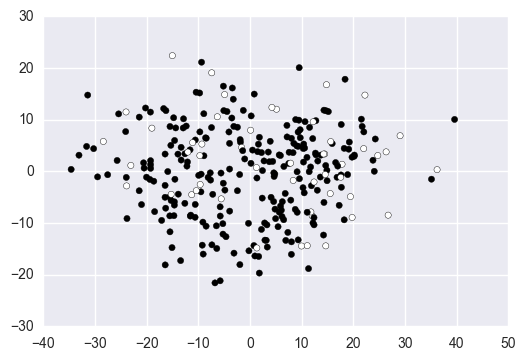

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Y[:, 0], Y[:, 1], c=train.Placement)

# Creating a Model

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

C:\Users\217216X717025\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [72]:
Y = train.Placement
test.drop('Placement',axis=1,inplace=True)
train.drop('Placement',axis=1,inplace=True)

In [73]:
X_train,X_test,Y_train,Y_test =  train_test_split(train,Y,test_size=0.3)

In [74]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((210, 8), (90, 8), (210L,), (90L,))

In [75]:
X_train.head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree
Student No,,,,,,,,
257,0,78.94,2,77.83,2,1,77.0,1
256,1,62.00,2,60.00,2,2,62.0,2
126,1,79.00,2,53.00,2,2,56.0,3
220,1,70.00,0,73.00,2,1,64.0,4
117,1,59.00,2,50.00,2,2,59.0,4


In [76]:
dt = DecisionTreeClassifier()

In [77]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [78]:
predict_y = dt.predict(X_train)
accuracy_score(predict_y,Y_train)

1.0

In [79]:
predict_y = dt.predict(X_test)
accuracy_score(predict_y,Y_test)

0.74444444444444446

In [80]:
print(confusion_matrix(Y_test,predict_y))

[[ 3  9]
 [14 64]]


## Overfitting

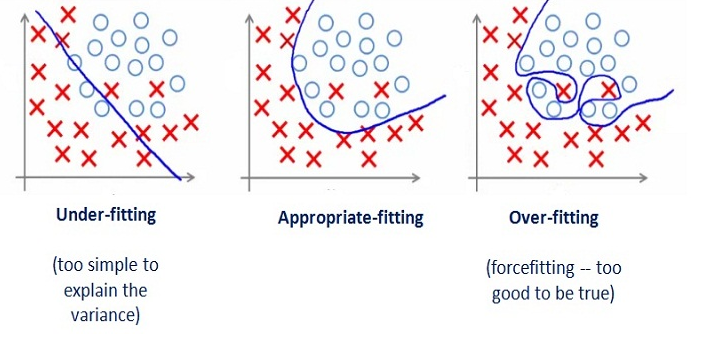

In [81]:
from IPython.display import Image
Image(filename='images/overfitting.PNG',width=500,height=300)

## Cross Validation

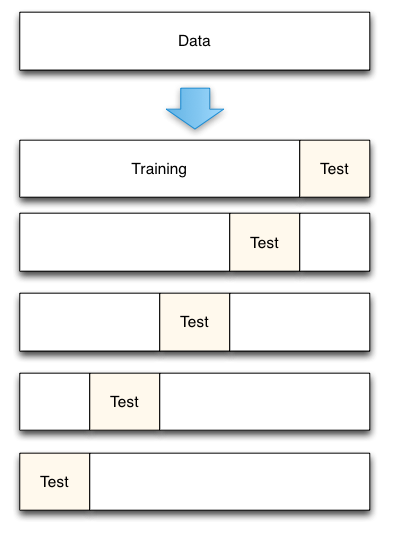

In [82]:
from IPython.display import Image
Image(filename='images/cross_validation.PNG',width=500,height=300)

In [83]:
dt = DecisionTreeClassifier()
cross_val_score(dt,X_train,Y_train,cv=5,n_jobs=-1)

array([ 0.6744186 ,  0.74418605,  0.71428571,  0.70731707,  0.73170732])

In [84]:
dt = DecisionTreeClassifier(max_depth=4)
cross_val_score(dt,X_train,Y_train,cv=5,n_jobs=-1)

array([ 0.81395349,  0.76744186,  0.73809524,  0.73170732,  0.82926829])

In [85]:
dt = DecisionTreeClassifier(max_depth=3)
cross_val_score(dt,X_train,Y_train,cv=5,n_jobs=-1).mean()

0.79583232044945029

In [86]:
dt.fit(X_train,Y_train)
predict_y = dt.predict(X_test)
print(accuracy_score(Y_test,predict_y))
print(confusion_matrix(Y_test,predict_y))

0.844444444444
[[ 1 11]
 [ 3 75]]


## Other Algorithms

In [87]:
#Random Forest
rf = RandomForestClassifier(n_estimators=30)
cross_val_score(rf,X_train,Y_train,cv=5,n_jobs=-1).mean()

0.8052453880020527

In [88]:
#SVM
svm = SVC()
cross_val_score(svm,X_train,Y_train,cv=5,n_jobs=-1).mean()

0.81919347432676981

# Hyper Parameter Tuning

In [89]:
#Grid Search cv
from sklearn.grid_search import GridSearchCV

C:\Users\217216X717025\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [90]:
#Preview different tunable paramters
dt = DecisionTreeClassifier()

In [91]:
#k_range = range(1,100,10) # 30
#depth_range = range(3,10,1)
#min_sample = range(2,10,2)
#max_leaf = range(2,10,2)

[mean: 0.78095, std: 0.02983, params: {'max_depth': 2}, mean: 0.79524, std: 0.04692, params: {'max_depth': 3}, mean: 0.77619, std: 0.04986, params: {'max_depth': 4}, mean: 0.71429, std: 0.06331, params: {'max_depth': 5}, mean: 0.73333, std: 0.04195, params: {'max_depth': 6}, mean: 0.69048, std: 0.06010, params: {'max_depth': 7}, mean: 0.70000, std: 0.05672, params: {'max_depth': 8}, mean: 0.69524, std: 0.04561, params: {'max_depth': 9}]
0.795238095238
{'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


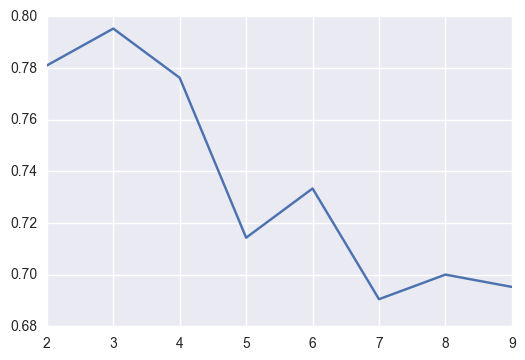

In [92]:
k_range = range(2,10,1)

param_grid = dict(max_depth=k_range)

grid = GridSearchCV(dt,param_grid,cv=5)

grid.fit(X_train,Y_train)

print grid.grid_scores_

import matplotlib.pyplot as plt
%matplotlib inline

grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range,grid_mean_scores)

print grid.best_score_
print grid.best_params_
print grid.best_estimator_

In [93]:
dt = DecisionTreeClassifier(max_depth=6)
cross_val_score(dt,X_train,Y_train,cv=5,n_jobs=-1).mean()

0.73310374631985531

# Prediction on Test Set

In [94]:
dt = DecisionTreeClassifier(max_depth=6)

In [95]:
dt.fit(train,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [96]:
test.head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree
Student No,,,,,,,,
301,1,68.0,2,67.0,2,2,69.0,3
302,0,51.0,0,52.0,2,1,50.0,4
303,1,60.6,0,66.6,0,1,55.7,4
304,0,70.0,1,94.0,2,1,77.0,1
305,1,63.0,2,48.0,2,2,64.0,2


In [97]:
test_predict = dt.predict(test)

In [98]:
test['Placement'] = test_predict 

In [99]:
#test[['Placement']].to_csv('data/Predicted.csv')